# Linear Regression implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import fetch_california_housing

#### We can display the dataset....
> fetch_california_housing()
But we will be loading it as a proper DataFrame, using pandas

In [3]:
df=fetch_california_housing()

In [4]:
dataset=pd.DataFrame(df.data)

In [5]:
dataset.shape

(20640, 8)

In [6]:
dataset.columns=df.feature_names

In [7]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Independent and Dependent variables
We split the dataset into the features that influence our result(indep) and the target feature(y- here, house prices)
Lets take first 1000 houses

In [9]:
X=dataset[:1000]
y=df.target[:1000]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


##### Train test split-
Splits dataset into training and testing in different combos, at a fixed test_size (here=30%) 
random_state=42, bcoz it has to be set to something for uniform split each time, and 42=ANSWER TO EVERYTHING

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.35,random_state=42)

### Standardising the data
(for more info, read stuff on standardising vs normalising data)

Note: X_train has been fit.transform, while X_test has only been .transform
      it is so that, the test data doesnt influence our training processes. **Read more about it**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

#initialise & train the model
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
#make the predictions 
y_train_pred = reg.predict(X_train)    #Training accuracy
y_test_pred = reg.predict(X_test)      #Testing accuracy


### Evaluation metrics (MSE and r^2)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean-Squared Error(training): {mse_train:.2f}')
print(f'Mean-Squared Error(testing): {mse_test:.2f}')
print(f'R-squared score: {r2_test:.2f}')

Mean-Squared Error(training): 0.32
Mean-Squared Error(testing): 0.23
R-squared score: 0.70


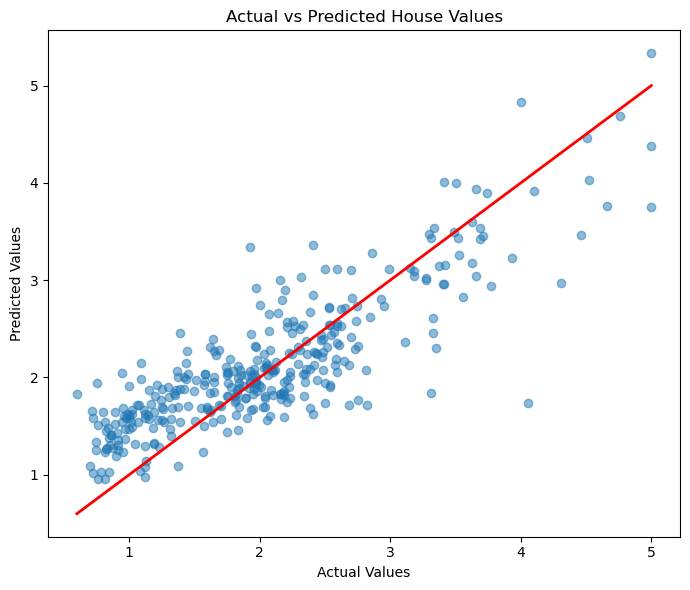

In [19]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.tight_layout()

#### Understand the Adv vs Disadv of MSE, MeanAbsError, RSME

MSE-> Not robust to outliers; Changes the units;
      Differntiable; Has 1 local maxima and 1 global maxima.